# This cell creates a bar chart to compare average MRP across categories.


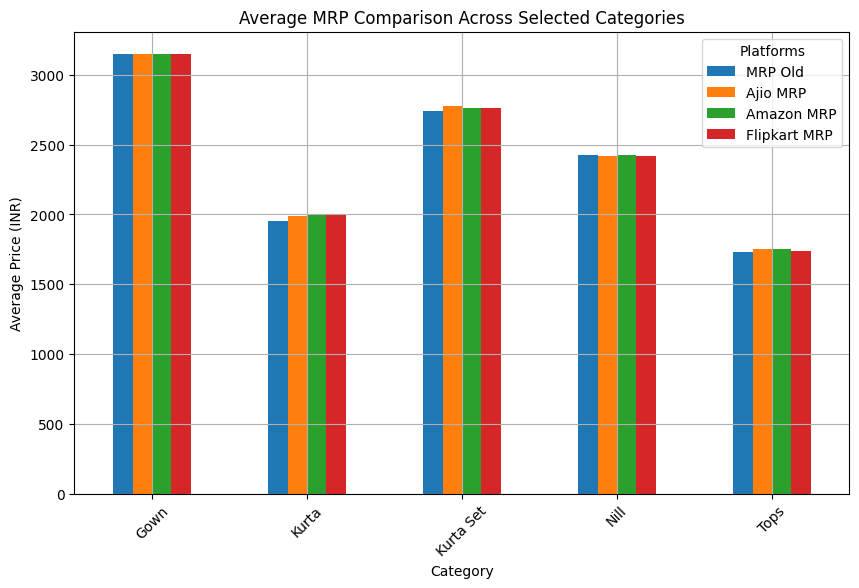

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load your CSV file (replace 'your_file.csv' with the actual file path)
df = pd.read_csv('/content/d.csv')

# Step 4: Convert relevant columns to numeric, handling errors
for col in ['MRP Old', 'Ajio MRP', 'Amazon MRP', 'Flipkart MRP']:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

# Step 5: Calculate the average price for each category and each MRP column
average_prices = df_filtered.groupby('Category')[['MRP Old', 'Ajio MRP', 'Amazon MRP', 'Flipkart MRP']].mean()

# Step 6: Plotting the bar chart
average_prices.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Average MRP Comparison Across Selected Categories')
plt.xlabel('Category')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Platforms')
plt.show()


# This cell counts the occurrences of each category in the DataFrame.


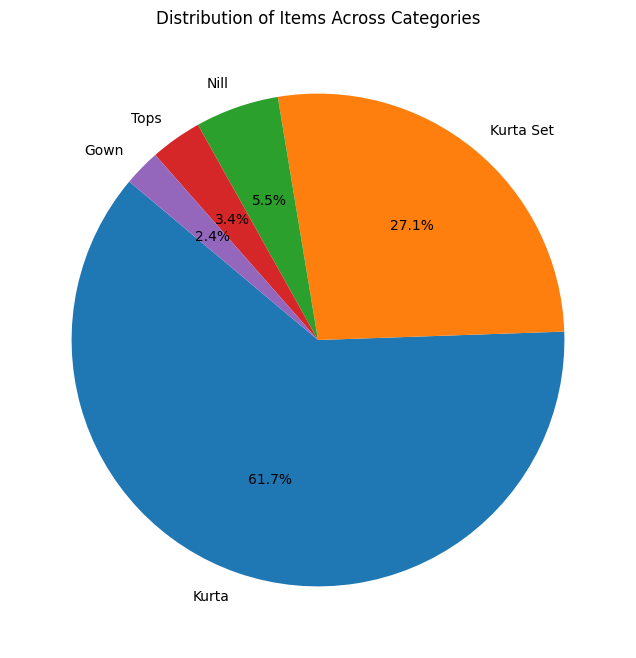

In [8]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load your CSV file (replace 'your_file.csv' with the actual file path)
df = pd.read_csv('/content/d.csv')

# Step 3: Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Step 4: Plotting the pie chart
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Distribution of Items Across Categories')
plt.ylabel('')  # Hide the 'y' label for better appearance
plt.show()


# This cell creates a KDE plot to visualize the distribution of 'MRP Old' prices.


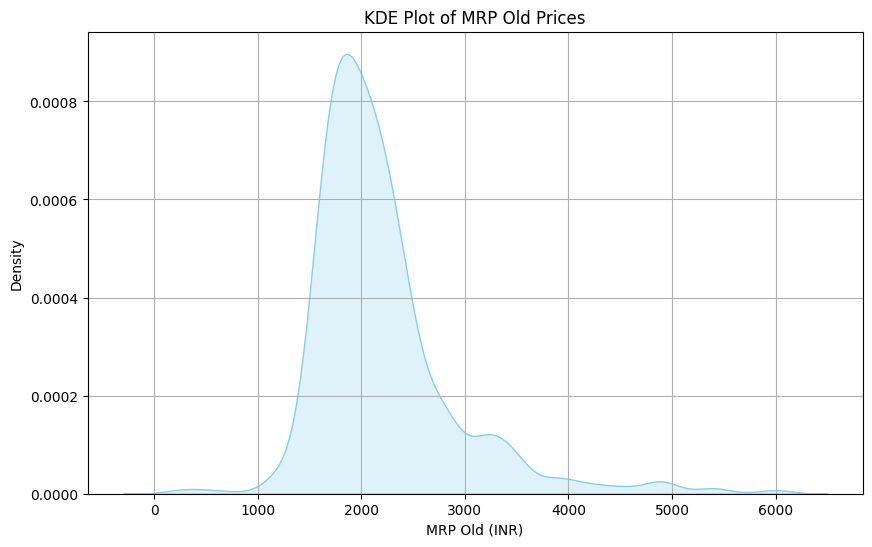

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load your CSV file (replace 'your_file.csv' with the actual file path)
df = pd.read_csv('/content/d.csv')

# Step 3: Convert the 'MRP Old' column to numeric, coercing errors
df['MRP Old'] = pd.to_numeric(df['MRP Old'], errors='coerce')

# Step 4: Drop NaN values from the 'MRP Old' column
df = df.dropna(subset=['MRP Old'])

# Step 5: Plotting the KDE for 'MRP Old'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['MRP Old'], fill=True, color='skyblue')

# Adding titles and labels
plt.title('KDE Plot of MRP Old Prices')
plt.xlabel('MRP Old (INR)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# This cell creates a timeline chart to visualize the monthly average of 'MRP Old' over time.


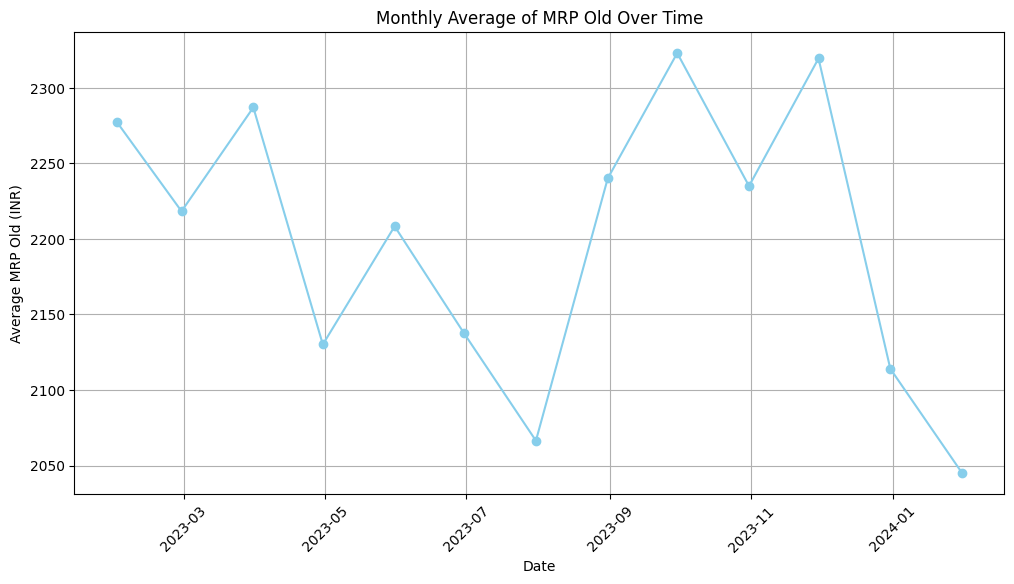

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV file (replace 'your_file.csv' with the actual file path)
df = pd.read_csv('/content/d.csv')

# Step 1: Generate a random date column
np.random.seed(0)  # For reproducibility
start_date = '2023-01-01'
end_date = '2024-01-01'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
random_dates = np.random.choice(date_range, size=len(df))

# Add the random dates to the DataFrame
df['Date Listed'] = random_dates

# Convert 'Date Listed' to datetime
df['Date Listed'] = pd.to_datetime(df['Date Listed'], errors='coerce')

# Convert 'MRP Old' to numeric, coercing errors
df['MRP Old'] = pd.to_numeric(df['MRP Old'], errors='coerce')

# Drop rows with NaN values in 'MRP Old' or 'Date Listed'
df = df.dropna(subset=['MRP Old', 'Date Listed'])

# Step 2: Set 'Date Listed' as the index
df.set_index('Date Listed', inplace=True)

# Resample data to get monthly averages (for 'MRP Old')
monthly_data = df['MRP Old'].resample('M').mean()

# Step 3: Plot the timeline chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data, marker='o', linestyle='-', color='skyblue')

# Adding titles and labels
plt.title('Monthly Average of MRP Old Over Time')
plt.xlabel('Date')
plt.ylabel('Average MRP Old (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# This cell creates a scatter plot to visualize the relationship between 'MRP Old' and 'Final MRP Old'.


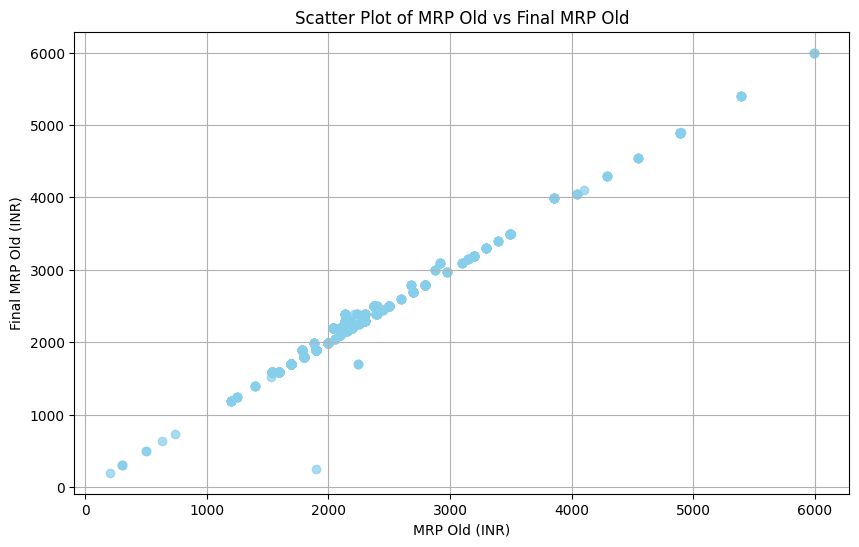

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file (replace 'your_file.csv' with the actual file path)
df = pd.read_csv('/content/d.csv')


# Convert relevant columns to numeric if needed
df['MRP Old'] = pd.to_numeric(df['MRP Old'], errors='coerce')
df['Final MRP Old'] = pd.to_numeric(df['Final MRP Old'], errors='coerce')

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['MRP Old', 'Final MRP Old'])

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['MRP Old'], df['Final MRP Old'], color='skyblue', alpha=0.7)

# Adding titles and labels
plt.title('Scatter Plot of MRP Old vs Final MRP Old')
plt.xlabel('MRP Old (INR)')
plt.ylabel('Final MRP Old (INR)')
plt.grid(True)
plt.show()


# This cell creates a bubble plot to visualize the relationship between 'MRP Old' and 'Final MRP Old', with bubble size representing 'Weight' and color representing 'Category'.


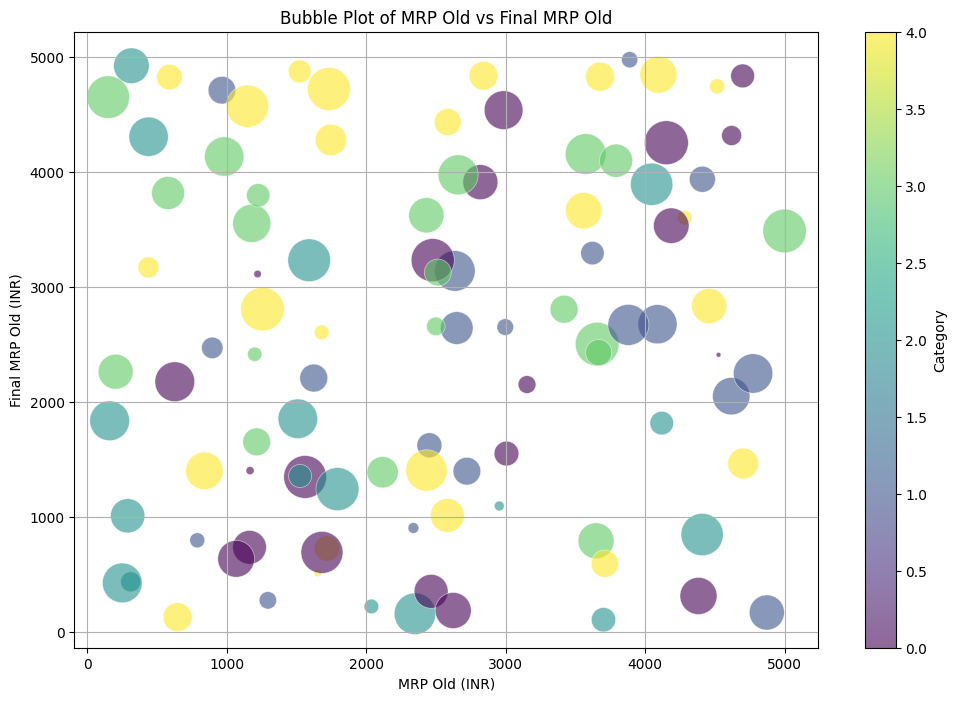

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation (replace this with your actual data loading)
data = {
    'MRP Old': np.random.uniform(100, 5000, 100),
    'Final MRP Old': np.random.uniform(100, 5000, 100),
    'Weight': np.random.uniform(1, 100, 100),
    'Category': np.random.choice(['Kurta', 'Kurta Set', 'Gown', 'Tops', 'Nill'], 100)
}
df = pd.DataFrame(data)

# Convert relevant columns to numeric if needed
df['MRP Old'] = pd.to_numeric(df['MRP Old'], errors='coerce')
df['Final MRP Old'] = pd.to_numeric(df['Final MRP Old'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['MRP Old', 'Final MRP Old', 'Weight'])

# Bubble Plot
plt.figure(figsize=(12, 8))

# Scatter plot with bubble size proportional to 'Weight'
scatter = plt.scatter(
    df['MRP Old'],
    df['Final MRP Old'],
    s=df['Weight']*10,  # Bubble size scaled up for better visibility
    alpha=0.6,
    c=pd.Categorical(df['Category']).codes,  # Color by 'Category'
    cmap='viridis',  # Color map for categories
    edgecolors='w',
    linewidth=0.5
)

# Adding titles and labels
plt.title('Bubble Plot of MRP Old vs Final MRP Old')
plt.xlabel('MRP Old (INR)')
plt.ylabel('Final MRP Old (INR)')

# Add a colorbar for the categories
plt.colorbar(scatter, label='Category')

plt.grid(True)
plt.show()
